In [4]:
from sklearn.externals import joblib
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import pandas as pd

data = pd.read_csv('boscun_X.csv')
X = pd.read_csv('boscun_X.csv').values
y = pd.read_csv('boscun_y.csv').values
column_names = data.columns
# random selection
train_x_disorder, test_x_disorder, train_y_disorder, test_y_disorder = train_test_split(X, y, train_size=0.8,
                                                                                        random_state=1)
model_random_forest = RandomForestRegressor(n_estimators= 10, random_state = 1)
model_random_forest.fit(train_x_disorder, train_y_disorder.ravel())
mlp_score = model_random_forest.score(test_x_disorder, test_y_disorder.ravel())
print('Score of regression model is ', mlp_score)

Score of regression model is  0.94983422616


In [5]:
import numpy as np

b = pd.DataFrame()
index = np.argsort(model_random_forest.feature_importances_)
b = pd.DataFrame(columns = column_names[index])
b.loc[0,:] = model_random_forest.feature_importances_[index]

In [6]:
y_predicted = model_random_forest.predict(test_x_disorder)

In [21]:
np.histogram(test_y_disorder.ravel() - y_predicted)

(array([     2,     12,   1027, 600233,    593,     11,      0,      3,
             0,      1]),
 array([-2827.9  , -1996.545, -1165.19 ,  -333.835,   497.52 ,  1328.875,
         2160.23 ,  2991.585,  3822.94 ,  4654.295,  5485.65 ]))

-11.70675 12.31075


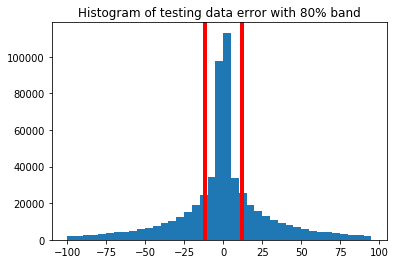

In [60]:
import matplotlib.pyplot as plt

bin1 = np.arange(-100., 100., 5.)
error = test_y_disorder.ravel() - y_predicted

plt.hist(error, bin1, histtype='stepfilled')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of testing data error with 80% band")

p25 = np.percentile(error, 25)
p75 = np.percentile(error, 75)

print(p25, p75)


plt.axvline(p25,linewidth=4, color='r')
plt.axvline(p75,linewidth=4, color='r')

plt.show()

In [13]:
p = np.percentile(a, 50)

array([[  473.91],
       [ 1219.69],
       [  321.93],
       ..., 
       [  456.29],
       [  574.43],
       [ 1835.83]])